<a href="https://colab.research.google.com/github/cherlhee/AI/blob/master/ai_laser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬을 이용하여 학습, 검증, 테스트 데이터 결과 확인하기

## 고강도 강 겹치기 레이저 용접부 모델링(분류)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [10]:
xy = np.loadtxt('./data_laser_2.csv', delimiter=',', dtype=np.float32)

# 가장 마지막 column이 분류, 나머지는 Input 변수
x_data = xy[:, 0:-1]
x_org = copy.deepcopy(x_data)
print('x;', x_data)



y_data = xy[:, [-1]]

print('y;', y_data)

x; [[ 590.  590.   70.    0.]
 [ 590.  590.   60.   -5.]
 [ 590.  590.   48.  -10.]
 [ 590.  590.   37.  -15.]
 [ 590.  590.   26.  -20.]
 [ 590.  590.   20.  -25.]
 [ 590.  780.   70.    0.]
 [ 590.  780.   60.   -5.]
 [ 590.  780.   48.  -10.]
 [ 590.  780.   40.  -10.]
 [ 590.  780.   32.  -15.]
 [ 590.  780.   24.  -20.]
 [ 590.  980.   70.    0.]
 [ 590.  980.   60.   -5.]
 [ 590.  980.   48.  -10.]
 [ 590.  980.   40.  -10.]
 [ 590.  980.   32.  -15.]
 [ 590.  980.   24.  -20.]
 [ 590. 1180.   70.    0.]
 [ 590. 1180.   60.   -5.]
 [ 590. 1180.   48.  -10.]
 [ 590. 1180.   36.  -10.]
 [ 590. 1180.   32.  -15.]
 [ 590. 1180.   24.  -20.]
 [ 590. 1500.   70.    0.]
 [ 590. 1500.   60.   -5.]
 [ 590. 1500.   48.  -10.]
 [ 590. 1500.   40.  -10.]
 [ 590. 1500.   32.  -15.]
 [ 590. 1500.   24.  -20.]
 [ 780.  780.   70.    0.]
 [ 780.  780.   60.   -5.]
 [ 780.  780.   48.  -10.]
 [ 780.  780.   40.  -10.]
 [ 780.  780.   32.  -15.]
 [ 780.  780.   24.  -20.]
 [ 780.  980.   70.    0.

In [11]:
# to make normal distribution of xdata;
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_data)
x2_data = scaler.transform(x_data)
print('x2;', x2_data)




x2; [[-1.014085   -1.9232539   1.5356734   1.5187199 ]
 [-1.014085   -1.9232539   0.92140406  0.7877852 ]
 [-1.014085   -1.9232539   0.18428081  0.05685048]
 [-1.014085   -1.9232539  -0.4914155  -0.67408425]
 [-1.014085   -1.9232539  -1.1671118  -1.4050189 ]
 [-1.014085   -1.9232539  -1.5356734  -2.1359537 ]
 [-1.014085   -1.2753491   1.5356734   1.5187199 ]
 [-1.014085   -1.2753491   0.92140406  0.7877852 ]
 [-1.014085   -1.2753491   0.18428081  0.05685048]
 [-1.014085   -1.2753491  -0.3071347   0.05685048]
 [-1.014085   -1.2753491  -0.7985502  -0.67408425]
 [-1.014085   -1.2753491  -1.2899656  -1.4050189 ]
 [-1.014085   -0.5933443   1.5356734   1.5187199 ]
 [-1.014085   -0.5933443   0.92140406  0.7877852 ]
 [-1.014085   -0.5933443   0.18428081  0.05685048]
 [-1.014085   -0.5933443  -0.3071347   0.05685048]
 [-1.014085   -0.5933443  -0.7985502  -0.67408425]
 [-1.014085   -0.5933443  -1.2899656  -1.4050189 ]
 [-1.014085    0.08866064  1.5356734   1.5187199 ]
 [-1.014085    0.08866064  

In [ ]:
# split data: Training data를 70%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
				       train_size=0.70, random_state=42)

# split data: Validation과 Test data를 50:50 으로
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
				       train_size=0.50, random_state=42)

In [ ]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 4-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 1s 41ms/step - loss: 1.0874 - accuracy: 0.4355 - val_loss: 0.8722 - val_accuracy: 0.6429
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.9053 - accuracy: 0.6452 - val_loss: 0.6896 - val_accuracy: 1.0000
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.7738 - accuracy: 0.6774 - val_loss: 0.5604 - val_accuracy: 1.0000
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6811 - accuracy: 0.7581 - val_loss: 0.4638 - val_accuracy: 1.0000
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6098 - accuracy: 0.7581 - val_loss: 0.3998 - val_accuracy: 1.0000
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5550 - accuracy: 0.8226 - val_loss: 0.3528 - val_accuracy: 1.0000
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.5073 - accuracy: 0.8226 - val_loss: 0.3197 - val_accuracy: 1.0000
Epoch 8/200
7/7 [===================

In [ ]:
# check results
for i in range(len(x_data)):
    print(x_org[i,:], y_data[i,:], model.predict(x_data)[i])

3/3 [==============================] - 0s 3ms/step
[590. 590.  70.   0.] [0.] [9.9999994e-01 2.0971545e-15 2.6574303e-15]
3/3 [==============================] - 0s 3ms/step
[590. 590.  60.  -5.] [0.] [9.9999994e-01 6.9797182e-11 1.1815683e-09]
3/3 [==============================] - 0s 4ms/step
[590. 590.  48. -10.] [0.] [9.6765298e-01 3.4485882e-05 3.2312516e-02]
3/3 [==============================] - 0s 3ms/step
[590. 590.  37. -15.] [2.] [1.0459923e-05 3.0716302e-04 9.9968243e-01]
3/3 [==============================] - 0s 3ms/step
[590. 590.  26. -20.] [2.] [1.6017228e-07 1.4809292e-03 9.9851876e-01]
3/3 [==============================] - 0s 5ms/step
[590. 590.  20. -25.] [2.] [6.7225909e-09 2.2303562e-03 9.9776965e-01]
3/3 [==============================] - 0s 4ms/step
[590. 780.  70.   0.] [0.] [9.9999994e-01 4.5740172e-14 7.9451955e-14]
3/3 [==============================] - 0s 4ms/step
[590. 780.  60.  -5.] [0.] [9.9999982e-01 1.7732229e-09 9.4305570e-08]
3/3 [===================

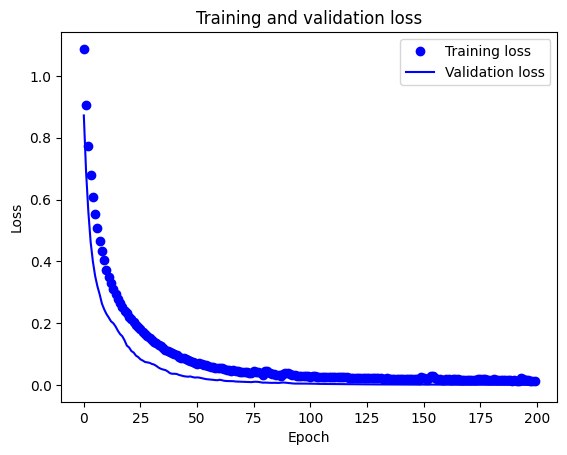

In [ ]:
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 안내
![image-2.png](attachment:image-2.png)

예제 파일은 아래에서 받을 수 있습니다.
     https://deepjoin.github.io/dl/

문의사항 및 의견: deepjoining@gmail.com